## Proyecto Python IB
### Tópico: Análisis de ventas anuales de VideoJuegos en los últimos 40 años.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

AttributeError: module 'pandas' has no attribute '_libs'

In [7]:
path = 'E:/Timeline/ProyectoBim_python/vgsales.csv'
columnas_a_usar = ['Rank','Name','Platform','Year',
                   'Genre','Publisher','NA_Sales',
                   'EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']
df_completo = pd.read_csv(
        path,
        usecols=columnas_a_usar,
        index_col='Rank'
        )

NameError: name 'pd' is not defined

In [6]:
df_completo.shape

NameError: name 'df_completo' is not defined

## Overview

In [4]:
df_completo.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Los  10 juegos mas vendidos:

In [14]:
# Juegos más vendidos:
df_mas_vendidos = df_completo[['Name','Global_Sales']]
diez_mas_vendidos = df_mas_vendidos.sort_values(by='Global_Sales',ascending = False).head(10)
diez_mas_vendidos

,Name,Global_Sales
Rank,,
1,Wii Sports,82.74
2,Super Mario Bros.,40.24
3,Mario Kart Wii,35.82
4,Wii Sports Resort,33.00
5,Pokemon Red/Pokemon Blue,31.37
6,Tetris,30.26
7,New Super Mario Bros.,30.01
8,Wii Play,29.02
9,New Super Mario Bros. Wii,28.62


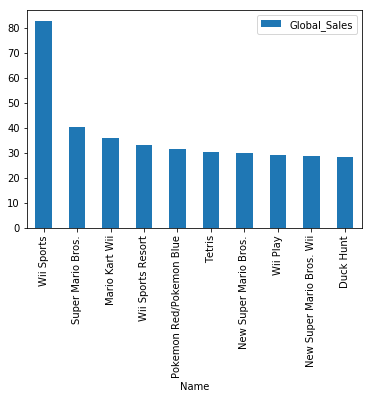

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

diez_mas_vendidos.plot(kind = 'bar', x='Name', y='Global_Sales')
plt.show()

### 10 Juegos más vendidos en Estados Unidos

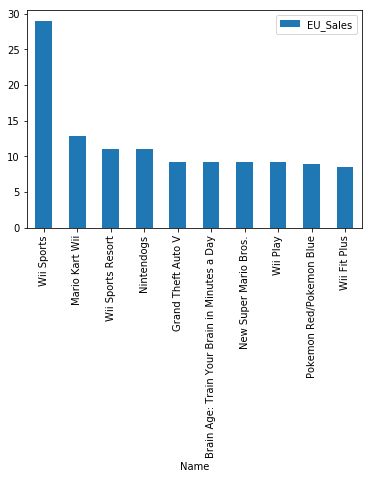

In [22]:
df_mas_vendidos_EU = df_completo[['Name','EU_Sales']]
diez_mas_vendidos_EU = df_mas_vendidos_EU.sort_values(by='EU_Sales',ascending = False).head(10)
diez_mas_vendidos_EU
diez_mas_vendidos_EU.plot(kind = 'bar', x='Name', y='EU_Sales')
plt.show()

### Repartición del mercado japonés 

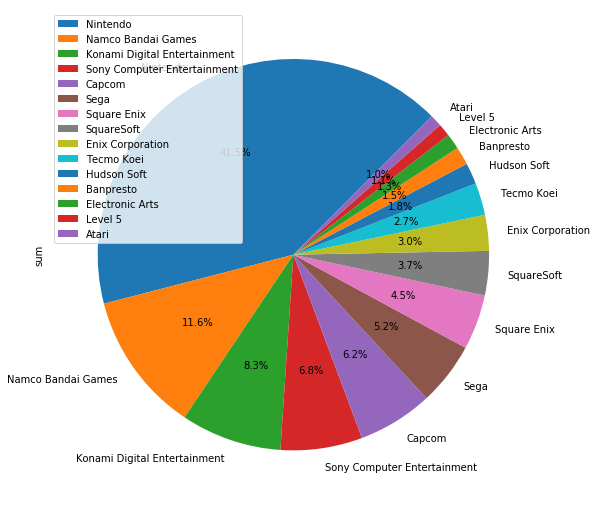

In [34]:
df_Ventas_Pub_US = df_completo.groupby(['Publisher'])['JP_Sales'].agg(['sum'])
df_Ventas_Pub_US2 = df_Ventas_Pub_US.sort_values(by='sum', ascending=False).reset_index().drop_duplicates('Publisher', keep='first')
quince_empresas = df_Ventas_Pub_US2.sort_values(by='sum',ascending=False).head(15)

quince_empresas.plot(kind='pie', y = 'sum', autopct='%2.1f%%', figsize=(9,9),
startangle=45, shadow=False, labels=quince_empresas['Publisher'], fontsize=10)
plt.show()

## Numero de juegos por género

In [44]:
df_generos_preferidos = df_completo.groupby(['Genre'])['Publisher'].agg(['count'])
df_generos_preferidos2 = df_generos_preferidos.sort_values(by='count', ascending=False).reset_index().drop_duplicates('Genre', keep='first')
df_generos_preferidos2

,Genre,count
0,Action,3309
1,Sports,2343
2,Misc,1712
3,Role-Playing,1486
4,Shooter,1308
5,Adventure,1282
6,Racing,1248
7,Platform,884
8,Simulation,863
9,Fighting,846


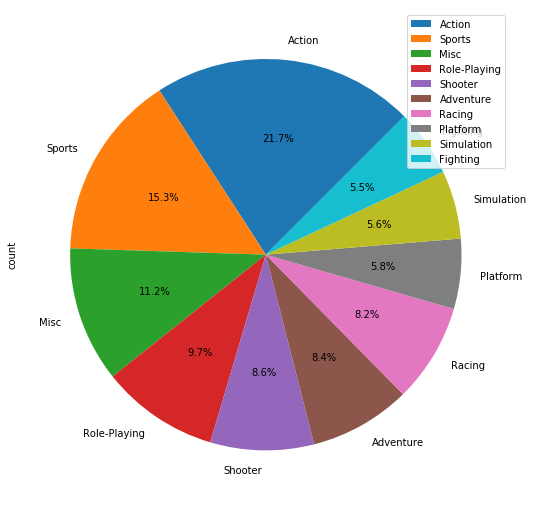

In [47]:
df_generos_preferidos = df_completo.groupby(['Genre'])['Publisher'].agg(['count'])
df_generos_preferidos2 = df_generos_preferidos.sort_values(by='count', ascending=False).reset_index().drop_duplicates('Genre', keep='first')
diez_generos_preferidos = df_generos_preferidos2.sort_values(by='count',ascending=False).head(10)

diez_generos_preferidos.plot(kind='pie', y = 'count', autopct='%2.1f%%', figsize=(9,9),
startangle=45, shadow=False, labels=diez_generos_preferidos['Genre'], fontsize=10)
plt.show()